In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Datasets/merged(flats_&_houses)_CLEANED2(Missing_Values_Treated)')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,orchid petals,sector 49,4.52,10984.0,5,5,3+,14.0,Moderately Old,3724.0,1,1,0,1,0,2,49
1,flat,sobha city,sector 108,2.60,15196.0,3,3,2,8.0,Relatively New,1711.0,0,0,0,0,0,2,99
2,flat,rof ananda,sector 95,0.38,58.0,2,2,2,10.0,New Property,71699.0,1,0,0,0,0,2,15
3,flat,signature global park,sohna road,0.70,6071.0,3,3,3,2.0,Relatively New,1281.0,0,0,0,1,0,2,152
4,house,independent,sector 24,5.25,38889.0,4,4,3+,2.0,Relatively New,1350.0,0,1,0,1,0,1,72


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 49,4.52,5,5,3+,14.0,Moderately Old,3724.0,1,1,0,1,0,2,49
1,flat,sector 108,2.60,3,3,2,8.0,Relatively New,1711.0,0,0,0,0,0,2,99
2,flat,sector 95,0.38,2,2,2,10.0,New Property,71699.0,1,0,0,0,0,2,15
3,flat,sohna road,0.70,3,3,3,2.0,Relatively New,1281.0,0,0,0,1,0,2,152
4,house,sector 24,5.25,4,4,3+,2.0,Relatively New,1350.0,0,1,0,1,0,1,72


### luxury score

<Axes: ylabel='luxury_score'>

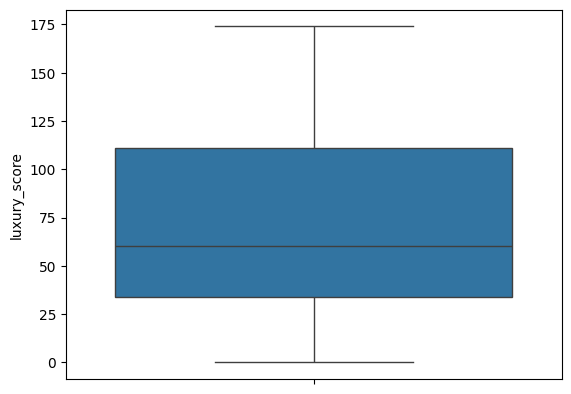

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 49,4.52,5,5,3+,14.0,Moderately Old,3724.0,1,1,0,1,0,2,49,Low
1,flat,sector 108,2.60,3,3,2,8.0,Relatively New,1711.0,0,0,0,0,0,2,99,Medium
2,flat,sector 95,0.38,2,2,2,10.0,New Property,71699.0,1,0,0,0,0,2,15,Low
3,flat,sohna road,0.70,3,3,3,2.0,Relatively New,1281.0,0,0,0,1,0,2,152,High
4,house,sector 24,5.25,4,4,3+,2.0,Relatively New,1350.0,0,1,0,1,0,1,72,Medium


### floorNum

<Axes: ylabel='floorNum'>

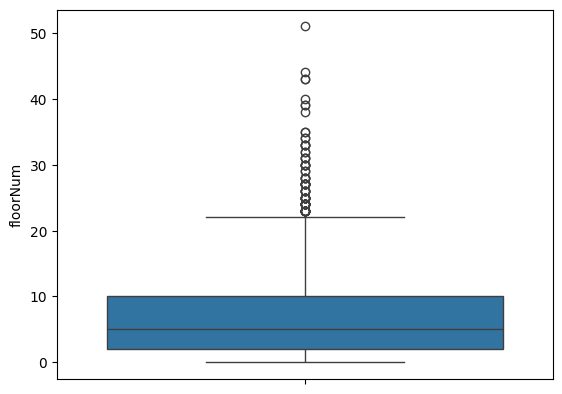

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 49,4.52,5,5,3+,14.0,Moderately Old,3724.0,1,1,0,1,0,2,49,Low,High Floor
1,flat,sector 108,2.60,3,3,2,8.0,Relatively New,1711.0,0,0,0,0,0,2,99,Medium,Mid Floor
2,flat,sector 95,0.38,2,2,2,10.0,New Property,71699.0,1,0,0,0,0,2,15,Low,Mid Floor
3,flat,sohna road,0.70,3,3,3,2.0,Relatively New,1281.0,0,0,0,1,0,2,152,High,Low Floor
4,house,sector 24,5.25,4,4,3+,2.0,Relatively New,1350.0,0,1,0,1,0,1,72,Medium,Low Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 49,4.52,5,5,3+,Moderately Old,3724.0,1,1,0,1,0,2,Low,High Floor
1,flat,sector 108,2.60,3,3,2,Relatively New,1711.0,0,0,0,0,0,2,Medium,Mid Floor
2,flat,sector 95,0.38,2,2,2,New Property,71699.0,1,0,0,0,0,2,Low,Mid Floor
3,flat,sohna road,0.70,3,3,3,Relatively New,1281.0,0,0,0,1,0,2,High,Low Floor
4,house,sector 24,5.25,4,4,3+,Relatively New,1350.0,0,1,0,1,0,1,Medium,Low Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,57.0,5,5,4.0,0.0,3724.0,1,1,0,1,0,2,1.0,0.0
1,0.0,12.0,3,3,2.0,3.0,1711.0,0,0,0,0,0,2,2.0,2.0
2,0.0,109.0,2,2,2.0,1.0,71699.0,1,0,0,0,0,2,1.0,2.0
3,0.0,113.0,3,3,3.0,3.0,1281.0,0,0,0,1,0,2,0.0,1.0
4,1.0,31.0,4,4,4.0,3.0,1350.0,0,1,0,1,0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,94.0,4,4,4.0,3.0,3850.0,1,1,0,1,1,1,1.0,2.0
3550,0.0,83.0,2,2,4.0,1.0,1312.0,0,0,0,0,0,2,2.0,2.0
3551,1.0,33.0,6,8,4.0,0.0,4500.0,1,1,1,1,0,1,2.0,2.0
3552,1.0,113.0,1,1,0.0,3.0,33.0,0,0,0,0,0,2,1.0,1.0


In [20]:
y_label

0        4.52
1        2.60
2        0.38
3        0.70
4        5.25
        ...  
3549     4.45
3550     1.10
3551    19.00
3552     0.07
3553     1.25
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

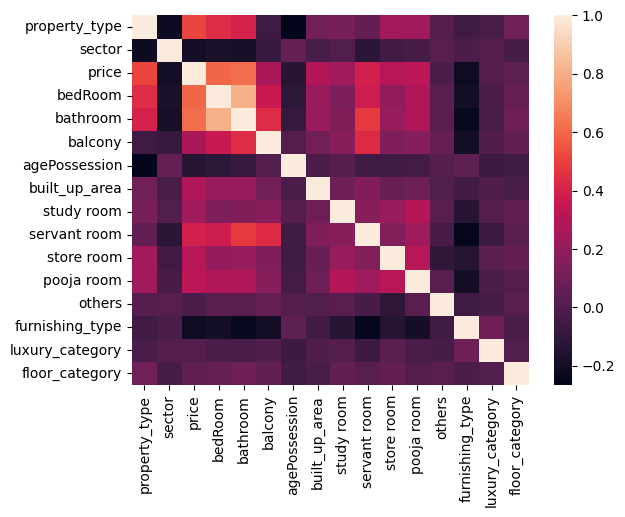

In [21]:
 sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.204292
1,price,1.000000
2,bedRoom,0.590147
3,bathroom,0.610732
4,balcony,0.272644
5,agePossession,-0.133717
6,built_up_area,0.287716
7,study room,0.238548
8,servant room,0.395282
9,store room,0.306690


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.626615
0,property_type,0.118124
1,sector,0.107425
3,bathroom,0.028795
2,bedRoom,0.026267
8,servant room,0.024201
5,agePossession,0.013286
4,balcony,0.012383
12,furnishing_type,0.009754
13,luxury_category,0.007277


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.667625
0,property_type,0.105449
1,sector,0.103467
3,bathroom,0.043534
2,bedRoom,0.036458
8,servant room,0.029146
9,store room,0.005421
12,furnishing_type,0.003912
5,agePossession,0.001958
7,study room,0.001034


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.717453
0,property_type,0.202693
1,sector,0.163384
2,bedRoom,0.052983
8,servant room,0.016218
3,bathroom,0.014735
12,furnishing_type,0.006608
4,balcony,0.005958
5,agePossession,0.005303
13,luxury_category,0.004468


### Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
0,property_type,0.778727
3,bathroom,0.578390
2,bedRoom,0.411310
8,servant room,0.380675
6,built_up_area,0.366367
9,store room,0.233571
7,study room,0.208328
10,pooja room,0.115595
13,luxury_category,0.075983
4,balcony,0.060770


### Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.631231
0,property_type,0.116189
1,sector,0.106625
2,bedRoom,0.028400
3,bathroom,0.025886
8,servant room,0.022347
4,balcony,0.012784
5,agePossession,0.012146
12,furnishing_type,0.010694
13,luxury_category,0.007495


### Technique 7 - Linear Regression Weights

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
0,property_type,0.784714
3,bathroom,0.575924
2,bedRoom,0.411049
8,servant room,0.382919
6,built_up_area,0.373550
9,store room,0.236104
7,study room,0.214321
10,pooja room,0.118625
13,luxury_category,0.086229
4,balcony,0.067809


### Technique 8 - SHAP

In [31]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-1.36350065e+00,  3.49908598e-01, -3.17018779e-02, ...,
        -3.18463370e-02,  3.37783088e-03, -3.12889902e-02],
       [-2.59571956e-01,  2.25337432e-02, -1.55712145e-02, ...,
        -1.43347915e-02,  1.38024848e-02, -4.04779407e-02],
       [-1.81468124e+00, -2.98250806e+00, -5.70146296e-01, ...,
        -4.86470242e-02, -9.12921741e-03, -2.37806530e-02],
       ...,
       [ 2.50911074e+00,  2.13377149e+00,  7.14325727e-01, ...,
         7.01109911e-02,  2.12426776e-02,  5.80127432e-02],
       [ 4.13057582e-01, -4.72906209e-01, -6.46499689e-02, ...,
        -1.83755039e-02, -6.81460684e-03, -7.04640781e-03],
       [-2.65701752e-01, -6.34871028e-01, -1.05266208e-02, ...,
        -1.89684960e-02,  7.44275536e-04,  2.84603820e-02]])

In [32]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.221120
0,property_type,0.495767
1,sector,0.392349
3,bathroom,0.134720
8,servant room,0.111628
2,bedRoom,0.059396
4,balcony,0.041475
12,furnishing_type,0.029505
14,floor_category,0.025927
5,agePossession,0.025910


In [33]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [34]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.204292,0.107425,0.103467,0.163384,-0.130086,0.106625,-0.138002,0.392349
bedRoom,0.590147,0.026267,0.036458,0.052983,0.411310,0.028400,0.411049,0.059396
bathroom,0.610732,0.028795,0.043534,0.014735,0.578390,0.025886,0.575924,0.134720
balcony,0.272644,0.012383,0.000767,0.005958,0.060770,0.012784,0.067809,0.041475
agePossession,-0.133717,0.013286,0.001958,0.005303,-0.000943,0.012146,-0.008295,0.025910
built_up_area,0.287716,0.626615,0.667625,0.717453,0.366367,0.631231,0.373550,1.221120
study room,0.238548,0.004615,0.001034,0.000423,0.208328,0.006132,0.214321,0.013135
servant room,0.395282,0.024201,0.029146,0.016218,0.380675,0.022347,0.382919,0.111628
store room,0.306690,0.006131,0.005421,-0.000200,0.233571,0.005630,0.236104,0.013212


In [35]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [36]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.694875
sector             0.141853
bathroom           0.037905
bedRoom            0.036856
servant room       0.030947
balcony            0.011018
agePossession      0.009732
furnishing_type    0.009644
floor_category     0.005962
luxury_category    0.005948
store room         0.005093
study room         0.004000
pooja room         0.003473
others             0.002693
dtype: float64

In [37]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,57.0,5,5,4.0,0.0,3724.0,1,1,0,1,0,2,1.0,0.0
1,0.0,12.0,3,3,2.0,3.0,1711.0,0,0,0,0,0,2,2.0,2.0
2,0.0,109.0,2,2,2.0,1.0,71699.0,1,0,0,0,0,2,1.0,2.0
3,0.0,113.0,3,3,3.0,3.0,1281.0,0,0,0,1,0,2,0.0,1.0
4,1.0,31.0,4,4,4.0,3.0,1350.0,0,1,0,1,0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,94.0,4,4,4.0,3.0,3850.0,1,1,0,1,1,1,1.0,2.0
3550,0.0,83.0,2,2,4.0,1.0,1312.0,0,0,0,0,0,2,2.0,2.0
3551,1.0,33.0,6,8,4.0,0.0,4500.0,1,1,1,1,0,1,2.0,2.0
3552,1.0,113.0,1,1,0.0,3.0,33.0,0,0,0,0,0,2,1.0,1.0


In [38]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [39]:
scores.mean()

0.8313647497292074

In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [41]:
scores.mean()

0.8316694195126505

In [42]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [45]:
export_df.to_csv('Datasets/GurgaonProperties.csv', index=False)